In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [2]:
df = pd.read_csv('../data/ru_lat_lng.csv')

In [3]:
df.head()

,name,country,subcountry,geonameid,lat,lng
0,Udomlya,Russia,Tverskaya,452949,57.876779,35.005110
1,Sosnovka,Russia,St.-Petersburg,461698,56.253352,51.283364
2,Sasovo,Russia,Rjazan,461699,54.349928,41.924087
3,Zyuzino,Russia,Moscow,461740,55.678753,38.120862
4,Zyablikovo,Russia,Moscow,461835,58.786994,36.710175


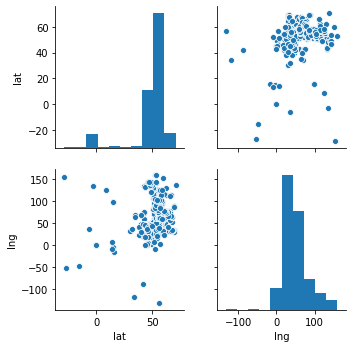

In [4]:
sns.pairplot(df[['lat','lng']]);

In [5]:
neg = df[(df['lat'] < 0) & (df['lng'] < 0)]

In [6]:
neg

,name,country,subcountry,geonameid,lat,lng
96,Uva,Russia,Udmurtiya,477656,-27.258883,-52.307785
514,Kozel’sk,Russia,Kaluga,543348,-15.802118,-47.889062


Definetely something is wrong

In [7]:
neg = df[(df['lat'] < 0)]

In [8]:
neg

,name,country,subcountry,geonameid,lat,lng
96,Uva,Russia,Udmurtiya,477656,-27.258883,-52.307785
207,Shakhun’ya,Russia,Nizjnij Novgorod,496012,-6.523098,35.114165
499,Biryulëvo Zapadnoye,Russia,MO,541406,-2.926199,133.602471
514,Kozel’sk,Russia,Kaluga,543348,-15.802118,-47.889062
965,Asino,Russia,Tomsk,1511309,-28.863483,153.045795


In [9]:
neg = df[(df['lng'] < 0)]

In [10]:
neg

,name,country,subcountry,geonameid,lat,lng
96,Uva,Russia,Udmurtiya,477656,-27.258883,-52.307785
376,Nikol’skoye,Russia,Moscow,521500,45.047234,-0.190847
377,Nikol’skoye,Russia,Leningrad,521509,45.047234,-0.190847
428,Mar’ino,Russia,Moscow,529237,41.888091,-87.628841
445,Luga,Russia,Leningrad,533690,15.604341,-16.213962
456,L’govskiy,Russia,Kursk,535334,34.048408,-118.252957
514,Kozel’sk,Russia,Kaluga,543348,-15.802118,-47.889062
563,Khosta,Russia,Krasnodarskiy,549424,43.160106,-1.088480
697,Buy,Russia,Kostroma,570508,14.848858,-3.735375
940,Gur’yevsk,Russia,Kemerovo,1506073,52.506509,-8.517583


### Get rid of negative values

In [11]:
no_neg = df[(df['lat'] > 0) & (df['lng'] > 0)]

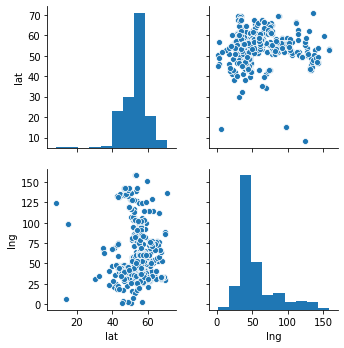

In [12]:
sns.pairplot(no_neg[['lat','lng']]);

In [13]:
no_neg[no_neg['lat'] < 20]

,name,country,subcountry,geonameid,lat,lng
27,Zamoskvorech’ye,Russia,Moscow,465057,15.245560,97.850367
214,Severnyy,Russia,Moscow,496348,8.242548,124.261465
285,Podporozh’ye,Russia,Leningrad,508034,15.245560,97.850367
974,Abaza,Russia,Khakasiya,1512205,14.098294,6.415750
1065,Zagor’ye,Russia,Moscow,6418201,15.245560,97.850367


Definetely 'outliers'

In [14]:
df_new = no_neg[no_neg['lat'] > 20]

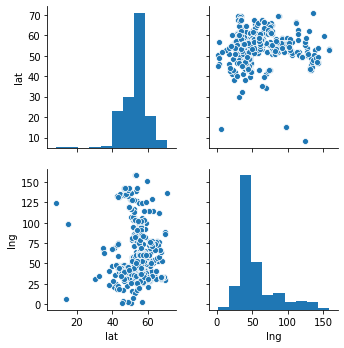

In [15]:
sns.pairplot(no_neg[['lat','lng']]);

In [16]:
df_new[df_new['name']=='Moscow']

,name,country,subcountry,geonameid,lat,lng
405,Moscow,Russia,Moscow,524901,55.755814,37.617635


Delete outliers manually

In [18]:
df_new[df_new['name'] == 'Kaliningrad']

,name,country,subcountry,geonameid,lat,lng
592,Kaliningrad,Russia,Kaliningrad,554234,54.70739,20.507307


In [19]:
df_lng = df_new[df_new['lng'] > 20.5]

In [21]:
df_lng[df_lng['name']=='Staraya Derevnya'] # take lat

,name,country,subcountry,geonameid,lat,lng
165,Staraya Derevnya,Russia,St.-Petersburg,489226,53.635144,24.418895


In [22]:
df_lng[df_lng['name']=='Novokuz’minki'] # take lng

,name,country,subcountry,geonameid,lat,lng
356,Novokuz’minki,Russia,Moscow,518657,51.137148,29.262126


In [23]:
df_left = df_lng[(df_lng['lat'] <  53.64) & (df_lng['lng'] < 30)]

In [24]:
df_left.index

Int64Index([ 122,  165,  185,  196,  299,  342,  343,  356,  460,  518,  643,
             668,  673,  689,  732,  760, 1036],
           dtype='int64')

In [25]:
df_left_clear = df_lng.drop(df_left.index)

In [27]:
print(df_lng[df_lng['name']=='Obukhovo']) # take lng right
print(df_lng[df_lng['name']=='Berëzovka']) # take lng left

         name country      subcountry  geonameid        lat        lng
806  Obukhovo  Russia  St.-Petersburg     873901  55.392459  28.243554
          name country     subcountry  geonameid        lat        lng
959  Berëzovka  Russia  Krasnoyarskiy    1510255  53.719388  25.498257


In [28]:
df_left_clearer = df_left_clear[(df_left_clear['lng'] <  25.49) | (df_left_clear['lng'] > 29.244)]

In [30]:
print(df_left_clearer[df_left_clearer['name']=='Sal’sk']) # take lat bot

       name country subcountry  geonameid        lat        lng
236  Sal’sk  Russia     Rostov     499161  41.264683  36.334131


In [31]:
df_bot = df_left_clearer[(df_left_clearer['lat'] >  41.275)]

In [33]:
print(df_bot[df_bot['name']=='Kinel’-Cherkassy']) # take lat top
print(df_bot[df_bot['name']=='Kurortnyy']) # take lng right

                 name country subcountry  geonameid        lat        lng
558  Kinel’-Cherkassy  Russia     Samara     548622  49.444433  32.059759
           name country subcountry  geonameid        lat        lng
1077  Kurortnyy  Russia  Leningrad    8436165  44.913326  35.192013


In [34]:
df_ukr = df_bot[(df_bot['lat'] <  49.45) & (df_bot['lng'] < 35.1921)]

In [35]:
df_ukr_clear = df_bot.drop(df_ukr.index)

In [37]:
to_del = ['Alekseyevka', 'Kurchatov', 'Zarya',
          'Dachnoye', 'Zapadnoye Degunino', 'Tobol’sk',
          'Zheleznodorozhnyy', 'Parnas', 'Koz’modem’yansk']

In [38]:
df_clear = df_ukr_clear

In [39]:
for city in to_del:
    df_clear = df_clear[df_clear['name'] != city]

In [47]:
m = folium.Map(
    location=[55.75, 37.61],
    zoom_start=12,
    tiles='Stamen Terrain'
)

for (_, city) in df_clear.iterrows():
    folium.Marker([city['lat'], city['lng']], popup=city['name'], icon=folium.Icon(icon='circle')).add_to(m)

m

Seems good

In [41]:
df_clear.to_csv('../data/ru_lat_lng_clear.csv', index=False)